# Preliminary Analysis

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set(); sns.set_context('notebook')

In [2]:
jumps = pd.read_csv('grasshopper_distances.csv')

## Distribution of Jumping Distances

Individual distributions.

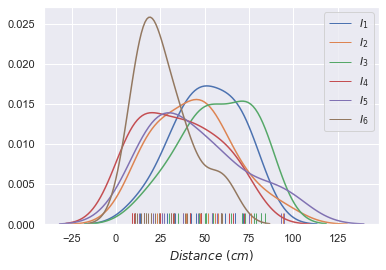

In [3]:
leg = []
for i in range(np.shape(jumps)[1]):
    fig = sns.distplot(jumps.iloc[:,i],hist = False,rug = True)
    leg.append('$I_{'+str(i+1)+'}$')
fig.legend(leg); plt.xlabel('$Distance\ (cm)$')
plt.savefig('jump-dist',dpi = 300)

Pooled distribution.

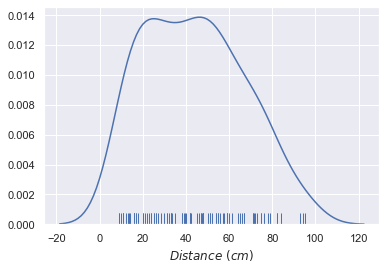

In [4]:
sns.distplot(jumps,rug = True, hist = False)
plt.xlabel('$Distance\ (cm)$')
plt.savefig('jump-dist_dist',dpi = 300)

In [5]:
traj = pd.read_csv('grasshopper_dist_angle.csv')

In [6]:
T = traj.replace(['F', 'H', '0'], float("nan"))

In [7]:
D = T[{'D1','D2','D3'}].copy().astype('float')
A = -T[{'A1','A2','A3'}].copy().astype('float')+180

## Escape Trajectories

Polar plot of escape trajectories. $0^\circ$ represents direction of predator approach.

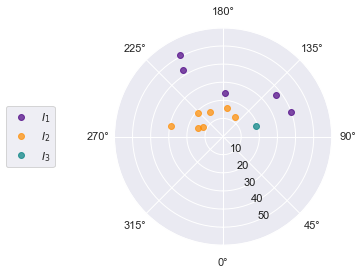

In [8]:
N = len(A)
a1 = A['A1']; a2 = A['A2']; a3 = A['A3']
fig = plt.figure(1); ax = fig.add_subplot(111, projection='polar')
for i in range(0,N):
    ax.plot(A['A1'].iloc[i]*np.pi/180,D['D1'].iloc[i],'o',color = 'indigo',alpha = 0.7)
    ax.plot(A['A2'].iloc[i]*np.pi/180,D['D2'].iloc[i],'o',color = 'darkorange', alpha = 0.7)
    ax.plot(A['A3'].iloc[i]*np.pi/180,D['D3'].iloc[i],'o',color = 'teal', alpha = 0.7)
ax.set_theta_zero_location('S')
fig.legend(['$I_1$', '$I_2$', '$I_3$'], loc = 'center left')
ax.set_yticklabels([10,20,30,40,50],color = 'k')
plt.ylim([0,60])
plt.savefig('jump-trajectories',dpi = 300);

Polar distribution of escape angles with respect to predator. $0^\circ$ represents direction of predator approach.

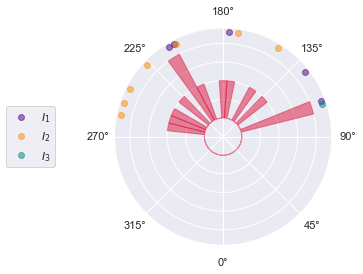

In [9]:
sns.set_style('dark')
a1 = A['A1']; a2 = A['A2']; a3 = A['A3']
degrees = np.vstack([a1,a2,a3])

bin_size = 8
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.5, color='crimson', edgecolor='crimson', alpha = 0.5)
ax.set_theta_zero_location("S")
ax.set_yticklabels([])

N = len(A)
for i in range(0,N):
    ax.plot(A['A1'].iloc[i]*np.pi/180,2.8,'o',color = 'indigo',alpha = 0.5)
    ax.plot(A['A2'].iloc[i]*np.pi/180,2.8,'o',color = 'darkorange',alpha = 0.5)
    ax.plot(A['A3'].iloc[i]*np.pi/180,2.8,'o',color = 'teal',alpha = 0.5)
fig.legend(['$I_1$', '$I_2$', '$I_3$'], loc = 'center left')

plt.savefig('escape-angle_dist',dpi = 300); plt.show()
sns.set()